In [1]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()

cur.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")
conn.commit()


In [ ]:
#Insert Sample Data

In [2]:
rows = [
    ("Widget A", 3, 9.99),
    ("Widget B", 5, 12.5),
    ("Widget A", 2, 9.99),
    ("Widget C", 10, 4.75),
    ("Widget D", 4, 20.0)
]

cur.executemany("INSERT INTO sales (product, quantity, price) VALUES (?,?,?)", rows)
conn.commit()


In [ ]:
# writing sql querry


In [3]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""


In [ ]:
# Load SQL Result Into Pandas

In [4]:
import pandas as pd

df = pd.read_sql_query(query, conn)
print(df)


    product  total_qty  revenue
0  Widget D          4    80.00
1  Widget B          5    62.50
2  Widget A          5    49.95
3  Widget C         10    47.50


In [11]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC;
"""


In [12]:
df = pd.read_sql_query(query, conn)
print(df)


    product  total_qty  revenue
0  Widget D          4    80.00
1  Widget B          5    62.50
2  Widget A          5    49.95
3  Widget C         10    47.50


In [14]:
print(df.columns)


Index(['product', 'total_qty', 'revenue'], dtype='object')


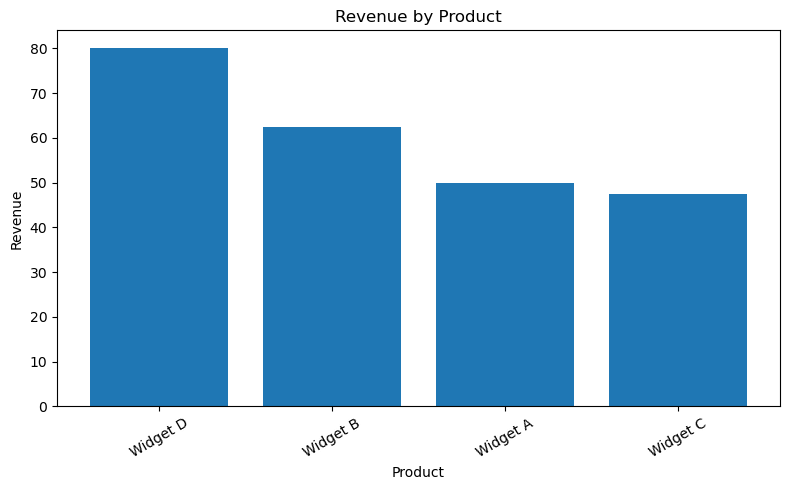

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.bar(df['product'], df['revenue'])
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")

plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("sales_chart.png")
plt.show()


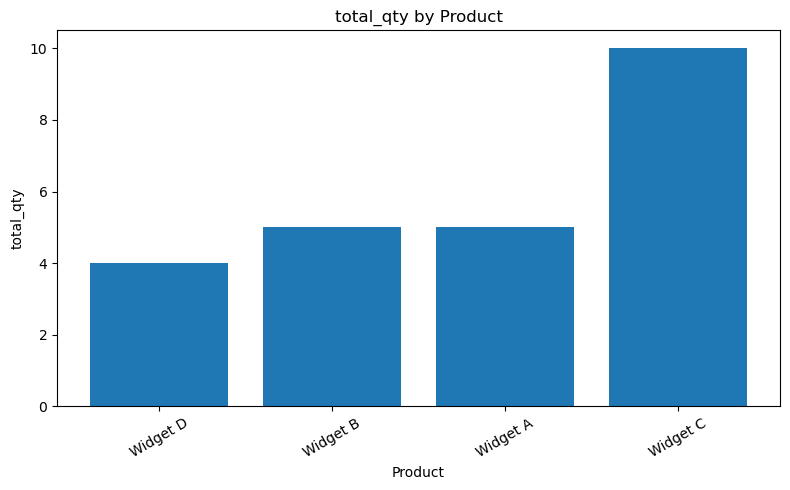

In [17]:
plt.figure(figsize=(8,5))

plt.bar(df['product'], df['total_qty'])
plt.xlabel("Product")
plt.ylabel("total_qty")
plt.title("total_qty by Product")

plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("sales_chart.png")
plt.show()

